In [2]:
# 我們只透過前1000筆資料做地理性資料分析
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
font_path = './font.ttf'  # 請替換成您自己的中文字型路徑
font = fm.FontProperties(fname=font_path)
qa10 = pd.read_csv("./QA_TGDS_JOB_23_10.csv")

In [3]:
data = qa10[qa10['On_City_GIS'] == '臺北市']
data = data[10000:20000]
data.shape

(10000, 19)

<Axes: >

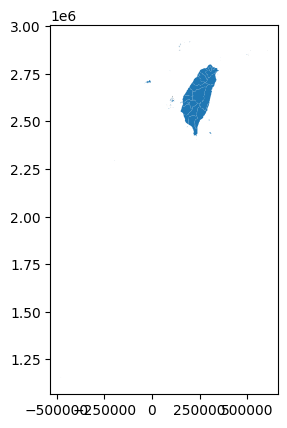

In [4]:
import geopandas as gpd
# Read shp data of Taiwan county
# 縣市界
County_data = gpd.read_file("./county/COUNTY_MOI_1090820.shp").to_crs(epsg=3826)
# 原本是經緯度，這裡改成公尺表示
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

<Axes: >

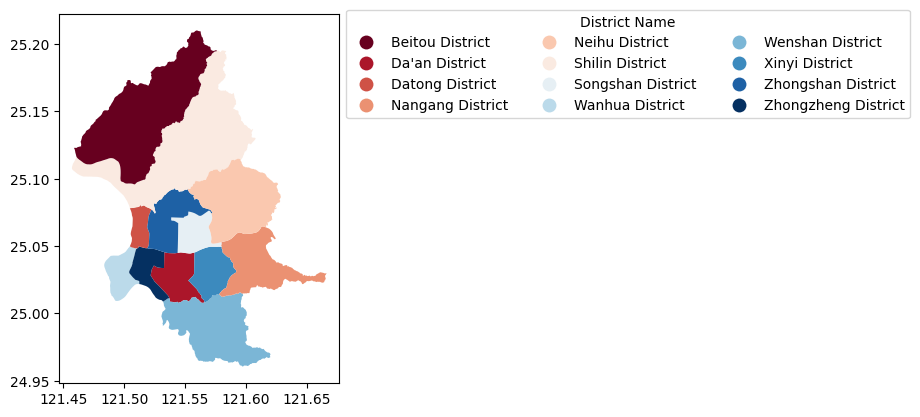

In [5]:
Town_data = gpd.read_file("./Town/TOWN_MOI_1120825.shp")
Town_data.head()
Big_Taipei = Town_data[(Town_data['COUNTYNAME']=='臺北市')] # | (Town_data['COUNTYNAME']=='新北市')
# add legend
leg_kwds={'title':'District Name',
          'loc': 'upper left',
          'bbox_to_anchor':(1, 1.03),
          'ncol':3}

Big_Taipei.plot(column='TOWNENG', cmap = 'RdBu', legend=True, legend_kwds=leg_kwds)


<Axes: >

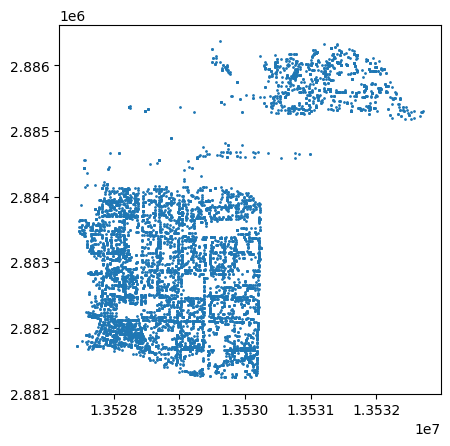

In [6]:
# read Youbike station csv
# covert csv file to geopandas format (geometry)
data_gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.On_Lng_X, data.On_Lat_Y)
)
# data_gdf.head()
# # set CRS and transform crs
data_gdf.crs = "EPSG:4326"
data_gdf = data_gdf.to_crs(epsg = 3857)
data_gdf.plot(markersize = 1)


# 刻意切過資料??? -> 應該是有進行過整合，同樣類型的資料放一起，所以前面幾萬筆都沒有台北的(之後改成用上車時間來排序資料可能比較不會錯)
# 鄉鎮應該也有進行過排序，需要隨機抽樣
# 不支持山區?
#最遠到新竹?


In [7]:
#嘗試random sampling
data = qa10[qa10['On_City_GIS'] == '臺北市']
data = data.sample(n=20000)
data.shape

(20000, 19)

<Axes: >

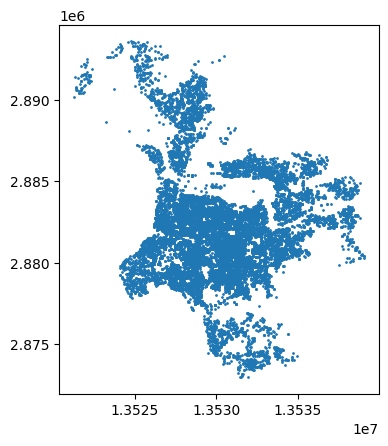

In [ ]:
# read Youbike station csv
# covert csv file to geopandas format (geometry)
data_gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.On_Lng_X, data.On_Lat_Y)
)
# data_gdf.head()
# # set CRS and transform crs
data_gdf.crs = "EPSG:4326"
data_gdf = data_gdf.to_crs(epsg = 3857)
data_gdf.plot(markersize = 1)


# 刻意切過資料???


In [ ]:
# 純粹確認
ls = ['中山區', '萬華區', '中正區', '大安區', '信義區', '松山區', '南港區','文山區', '內湖區', '北投區', '士林區','大同區']
for i in ls:
    data = qa10[qa10['On_Dist_GIS'] == i]
    print(data.shape)

(171608, 19)
(43108, 19)
(92221, 19)
(177744, 19)
(110245, 19)
(109527, 19)
(35963, 19)
(42904, 19)
(94121, 19)
(32872, 19)
(58627, 19)
(45286, 19)


In [ ]:
data = qa10.sample(n=20000)
data['On_City_GIS'].unique()
# 只有五個縣市的北台灣資料，剩下不提供? 扯

array(['臺北市', '新竹縣', '新北市', '桃園市', '新竹市'], dtype=object)

<Axes: >

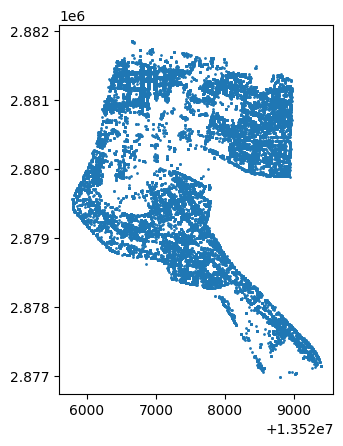

In [ ]:
#特殊現象
data = qa10[qa10['On_Dist_GIS'] == '中正區']
# data = data.sample(n=20000)
data_gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.On_Lng_X, data.On_Lat_Y)
)
# data_gdf.head()
# # set CRS and transform crs
data_gdf.crs = "EPSG:4326"
data_gdf = data_gdf.to_crs(epsg = 3857)
data_gdf.plot(markersize = 1)

<Axes: >

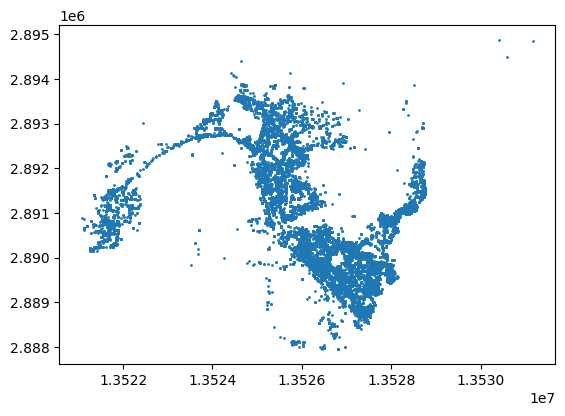

In [ ]:
data = qa10[qa10['On_Dist_GIS'] == '北投區']
# data = data.sample(n=20000)
data_gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.On_Lng_X, data.On_Lat_Y)
)
# data_gdf.head()
# # set CRS and transform crs
data_gdf.crs = "EPSG:4326"
data_gdf = data_gdf.to_crs(epsg = 3857)
data_gdf.plot(markersize = 1)

In [ ]:
# 目前只能計算兩個點之間的直線距離，沒有路徑功能，但可以做為參考
# 這樣是直線距離
# qa10['Distance_km'] = None
# start = time.time()
# for i in range(len(qa10)):
#     qa10.at[i, 'Distance_km'] = distance
#     if i%5000 == 0:
#         print(f"第 {i+1} 列的距離為 {distance:.2f} 公里。")
# end = time.time()
# print(f"時間花費 {(end-start):.2f} 秒。") #take about 15 mins to complete.
from geopy.distance import geodesic
import time
for i in range(10):
    coords_1 = (qa10.iloc[i]['On_Lat_Y'], qa10.iloc[i]['On_Lng_X'])
    coords_2 = (qa10.iloc[i]['Off_Lat_Y'], qa10.iloc[i]['Off_Lng_X'])
    distance = geodesic(coords_1, coords_2).kilometers
    print(f"第 {i+1} 趟的距離為 {distance:.2f} 公里。")

第 1 趟的距離為 7.93 公里。
第 2 趟的距離為 3.72 公里。
第 3 趟的距離為 7.38 公里。
第 4 趟的距離為 27.71 公里。
第 5 趟的距離為 6.06 公里。
第 6 趟的距離為 13.01 公里。
第 7 趟的距離為 2.00 公里。
第 8 趟的距離為 1.16 公里。
第 9 趟的距離為 2.58 公里。
第 10 趟的距離為 0.59 公里。


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
# 這邊我們放入經緯度使用 .reverse
location = geolocator.geocode("新北市淡水區淡金路38巷")
print(location.address) #location 的地址
print((location.latitude, location.longitude)) # location 的緯度與經度
print(location.raw) # location 的完整地理編碼的結果

淡金路38巷, 竿蓁里, 淡水區, 紅樹林, 新北市, 25161, 臺灣
(25.1613064, 121.4578071)
{'place_id': 202522713, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 448879837, 'lat': '25.1613064', 'lon': '121.4578071', 'class': 'highway', 'type': 'residential', 'place_rank': 26, 'importance': 0.10000999999999993, 'addresstype': 'road', 'name': '淡金路38巷', 'display_name': '淡金路38巷, 竿蓁里, 淡水區, 紅樹林, 新北市, 25161, 臺灣', 'boundingbox': ['25.1608065', '25.1615767', '121.4565816', '121.4583860']}


In [ ]:
data = qa10.sample(100)
for i in range(10):
    xy = str(data.iloc[i]['Off_Lat_Y'])+ ", "+str(data.iloc[i]['Off_Lng_X'])
    print(xy)
    location = geolocator.geocode(xy)
    print(location.address) #location 的地址
    print(location.raw) # location 的完整地理編碼的結果

25.068837, 121.612505
6號, 東湖路, 南港軟體園區一期, 內湖區, 五分, 臺北市, 114, 臺灣
{'place_id': 203767085, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 10907292658, 'lat': '25.0687086', 'lon': '121.6124569', 'class': 'place', 'type': 'house', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'place', 'name': '', 'display_name': '6號, 東湖路, 南港軟體園區一期, 內湖區, 五分, 臺北市, 114, 臺灣', 'boundingbox': ['25.0686586', '25.0687586', '121.6124069', '121.6125069']}
25.057453, 121.522906
三德大樓, 71, 中山北路二段, 中山里, 中山區, 南西商圈, 臺北市, 10446, 臺灣
{'place_id': 203509249, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'way', 'osm_id': 305442010, 'lat': '25.05728685', 'lon': '121.52313230022824', 'class': 'building', 'type': 'apartments', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'building', 'name': '三德大樓', 'display_name': '三德大樓, 71, 中山北路二段, 中山里, 中山區, 南西商圈, 臺北市, 10446, 臺灣', 'boun

In [29]:
# 測試geo資料及
# https://medium.com/@fearless_fusion_snake_755/%E7%8E%A9%E7%8E%A9%E7%9C%8B%E5%9C%B0%E7%90%86%E7%A9%BA%E9%96%93%E8%B3%87%E6%96%99-3-%E5%9C%B0%E7%90%86%E7%A9%BA%E9%96%93%E8%B3%87%E6%96%99%E9%80%A3%E6%8E%A5%E8%88%87%E5%88%86%E7%B5%84%E6%93%8D%E4%BD%9C-7efa4a802b7c
qa10s = qa10.head(50)
qa10s = qa10s.loc[~np.isnan(qa10s["Off_Lat_Y"])]
qa10s = gpd.GeoDataFrame(
    qa10s, geometry=gpd.points_from_xy(qa10s.Off_Lng_X, qa10s.Off_Lat_Y))
qa10s.crs = "EPSG:4326"
qa10s = qa10s.to_crs(epsg=4326)
qa10s.head()


,JobID,SN,CustPhone,sex,JobTime,svcTime,EndTime,On_City_GIS,On_Dist_GIS,On_Road,Off_City_GIS,Off_Dist_GIS,On_Lng_X,On_Lat_Y,Off_Lng_X,Off_Lat_Y,APP_Member_Level,paytype,AgentDriver,geometry
0,DAP2310090A636,1,08E5225390117ADAADC66A4A398EDBB6F510AEA7,女生,2023-10-09 13:27:48 UTC,2023-10-09 13:30:51,2023-10-09 13:58:51,新北市,深坑區,文化街,臺北市,大安區,121.619277,25.000112,121.552914,25.038412,2.銀熊,敬老愛心卡,False,POINT (121.55291 25.03841)
1,DAP2310090M960,1,F2D2FE956443AD4CFD28D92587D2873CCCC8952F,男生,2023-10-09 19:07:01 UTC,2023-10-09 19:13:03,2023-10-09 19:22:03,桃園市,龍潭區,中正路,桃園市,龍潭區,121.216663,24.866326,121.233874,24.836670,0.小熊,現金,False,POINT (121.23387 24.83667)
2,DAP2310090L299,1,B27BD63B948BA3CD7F17586CE4726D1EA940F0EB,未知,2023-10-09 18:40:42 UTC,2023-10-09 18:47:39,2023-10-09 19:11:20,新竹縣,湖口鄉,中華路,新竹縣,竹北市,121.007457,24.868518,121.038155,24.808074,3.金熊,現金,False,POINT (121.03816 24.80807)
3,DIP2310091F865,1,5D3621C692C3A2C56DD518C9EB60A0AE9C7C9C68,男生,2023-10-09 17:44:42 UTC,2023-10-09 17:54:11,2023-10-09 18:41:07,桃園市,大溪區,介壽路,新竹縣,竹東鎮,121.283089,24.900963,121.091170,24.722350,1.黑熊,現金,False,POINT (121.09117 24.72235)
4,DIP2310090I655,1,5C984280F79513D8C73DE3BE992A9D6CBBF260C0,女生,2023-10-09 10:32:26 UTC,2023-10-09 10:36:16,2023-10-09 10:58:19,新北市,鶯歌區,永和街,桃園市,桃園區,121.333468,24.969054,121.314820,25.021099,1.黑熊,現金,False,POINT (121.31482 25.02110)


In [36]:
#本期發布之不動產買賣實價登錄批次資料 : https://data.gov.tw/dataset/25119
newtaipei = pd.read_csv("./lvr_landAcsv/f_lvr_land_a.csv")
data = newtaipei[newtaipei['都市土地使用分區'] == '住'].sample(n=10)
data[["土地位置建物門牌","都市土地使用分區", '建物型態', '主要用途', '主建物面積', '車位總價元',"單價元平方公尺" ]]

,土地位置建物門牌,都市土地使用分區,建物型態,主要用途,主建物面積,車位總價元,單價元平方公尺
209,新北市汐止區汐萬路一段２２０號２樓,住,住宅大樓(11層含以上有電梯),住家用,148.34,0,83544
65,新北市土城區水源街３５巷６號四樓,住,公寓(5樓含以下無電梯),住家用,96.17,0,107102
491,新北市淡水區大信街５２巷３號五樓,住,華廈(10層含以下有電梯),住家用,71.25,500000,92392
241,新北市中和區大勇街２５巷１５弄１５號,住,公寓(5樓含以下無電梯),住家用,73.82,0,74641
116,新北市三重區仁義街２３３之１號三樓,住,公寓(5樓含以下無電梯),住家用,62.0,0,146269
850,新北市泰山區泰林路二段４１４巷６號三樓,住,住宅大樓(11層含以上有電梯),住家用,135.88,0,78841
779,新北市五股區西雲路６９號二樓,住,華廈(10層含以下有電梯),住家用,79.85,0,96786
774,新北市板橋區稚暉街４８巷１３號四樓,住,公寓(5樓含以下無電梯),住家用,71.83,0,101205
617,新北市三重區車路頭街１３１巷３號四樓,住,公寓(5樓含以下無電梯),住家用,37.74,0,139645
1410,新北市五股區芳洲二路５７號六樓,住,住宅大樓(11層含以上有電梯),住家用,57.29,0,84485


In [37]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
import re
import unicodedata
def extract_text_before_number(input_string):
    match = re.search(r'([^0-9]+)\d+', input_string)
    if match:
        return match.group(1)
    return None

for i,name in data.iterrows():
    text = name["土地位置建物門牌"]
    name = ''.join([unicodedata.normalize('NFKC', char) for char in text])
    roadname = extract_street_name(name)
    print(roadname)
    location = geolocator.geocode(roadname)
    print(location.address) #location 的地址
    print((location.latitude, location.longitude)) # location 的緯度與經度
    # print(location.raw) # location 的完整地理編碼的結果

新北市汐止區汐萬路


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%E6%96%B0%E5%8C%97%E5%B8%82%E6%B1%90%E6%AD%A2%E5%8D%80%E6%B1%90%E8%90%AC%E8%B7%AF&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [20]:
newtaipei.columns

Index(['鄉鎮市區', '交易標的', '土地位置建物門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積平方公尺', '車位總價元',
       '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯', '移轉編號'],
      dtype='object')

In [ ]:
import unicodedata

def fullwidth_to_halfwidth(text):
    # 將全形數字轉換為半形數字
    return ''.join([unicodedata.normalize('NFKC', char) for char in text])

# 測試
fullwidth_num = '３９５nbgvfdfgbnh'
halfwidth_num = fullwidth_to_halfwidth(fullwidth_num)
print(halfwidth_num)  # 輸出: 395

395nbgvfdfgbnh


In [8]:
#時價登陸資料庫：將收集到的資料轉乘點狀收藏，然後做成heatmap之類的
#更好用的可能是臺北市113年公告現值公告地價
#公告土地現值(新臺幣元／㎡)	公告地價(新臺幣元／㎡)
#https://www.hbhousing.com.tw/News/Detail.aspx?Num=5364
taipei = pd.read_csv("./臺北市113年公告現值公告地價.csv", encoding='utf-8')



In [9]:
taipei = taipei.sample(n=20)
taipei


,縣市別,行政區,段小段,地號,公告土地現值(新臺幣元／㎡),公告地價(新臺幣元／㎡)
185942,臺北市,萬華區,莒光段三小段,3220001,246032,65318
115631,臺北市,信義區,雅祥段四小段,5760000,378000,100000
330715,臺北市,北投區,崇仰段一小段,4810000,7500,2000
251184,臺北市,文山區,興安段二小段,1910000,202000,53600
273137,臺北市,文山區,老泉段二小段,2500000,3700,980
336573,臺北市,北投區,大屯段一小段,2050000,2500,660
32316,臺北市,松山區,寶清段五小段,350000,347000,92100
17887,臺北市,中正區,中正段二小段,100000,770000,204000
54243,臺北市,南港區,玉成段三小段,7690000,335000,88900
414538,臺北市,士林區,新安段五小段,80000,10400,2800


In [13]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
# 這邊我們放入經緯度使用 .reverse
location = geolocator.geocode("臺北市萬華區莒光")
print(location.address) #location 的地址
print((location.latitude, location.longitude)) # location 的緯度與經度
print(location.raw) # location 的完整地理編碼的結果

雙園國小, 315, 莒光路, 雙園里, 萬華區, 下崁, 臺北市, 10860, 臺灣
(25.03015985, 121.49825638291975)
{'place_id': 201323689, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 211531, 'lat': '25.03015985', 'lon': '121.49825638291975', 'class': 'amenity', 'type': 'school', 'place_rank': 30, 'importance': 9.99999999995449e-06, 'addresstype': 'amenity', 'name': '雙園國小', 'display_name': '雙園國小, 315, 莒光路, 雙園里, 萬華區, 下崁, 臺北市, 10860, 臺灣', 'boundingbox': ['25.0294833', '25.0309807', '121.4973843', '121.4991045']}


整理：
1. XX市113年公告現值公告地價 https://data.gov.tw/dataset/122058
2. XX市實價登陸表 https://data.gov.tw/dataset/25119
3. 鄉鎮市邊界 https://data.gov.tw/dataset/7441
4. 縣市邊界 https://data.gov.tw/dataset/7442
5. 地圖(1/25000) https://data.gov.tw/dataset/33485
6.